In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.

In [104]:
# reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (233154, 41)
Shape of Test : (112392, 40)


In [105]:
# lets look at the head of the train

train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [106]:
# lets look at the head of the test data

test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [107]:
# let's decsribe the train set

train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [108]:
# let's describe the test set

test.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.0,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.00000,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,1.0,0.869626,0.191588,0.120978,0.016709,0.001913,288.138106,2.22716,0.928260,0.152235,1.485912e+05,1.912856e+05,1.919172e+05,0.023560,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,0.0,0.336716,0.393553,0.326104,0.128181,0.043696,339.806585,4.55903,1.733452,0.531832,8.890925e+05,1.069343e+06,1.077010e+06,0.393237,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.012765e+06,-4.815000e+05,0.000000e+00,0.000000,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,2.00000,1.000000,0.000000,2.472500e+04,5.100000e+04,5.000000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,879.000000,130.00000,38.000000,22.000000,6.714607e+07,8.367934e+07,8.367934e+07,57.000000,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [109]:
# get the info of train

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [110]:
# get the info of test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [111]:
# getting the data types of train

train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [112]:
# getting the data types of test

test.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [113]:
# checking if there exists any NULL values in the train set

train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [114]:
# checking if there exists any NULL values in the test set

test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [115]:
# checking the values present in the Employement.Type attribute in the train and test sets

train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [116]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment i.e., self employed and salaried
# but the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum().sum())
print("Null values left in the test set:", test.isnull().sum().sum())

Null values left in the train set: 0
Null values left in the test set: 0


In [117]:
# let's save the unique id of the test set and labels set

unique_id = test['UniqueID']
y_train = train.iloc[:, -1]

# let's delete the last column from the dataset to  concat train and test
train = train.drop(['loan_default'], axis = 1)

# shape of train
train.shape

(233154, 40)

In [118]:
# lets concat the train and test sets for preprocessing and visualizations

data = pd.concat([train, test], axis = 0)

# let's check the shape
data.shape

(345546, 40)

In [119]:
# let's check the employement type in the data

data['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Unemployed        11104
Name: Employment.Type, dtype: int64

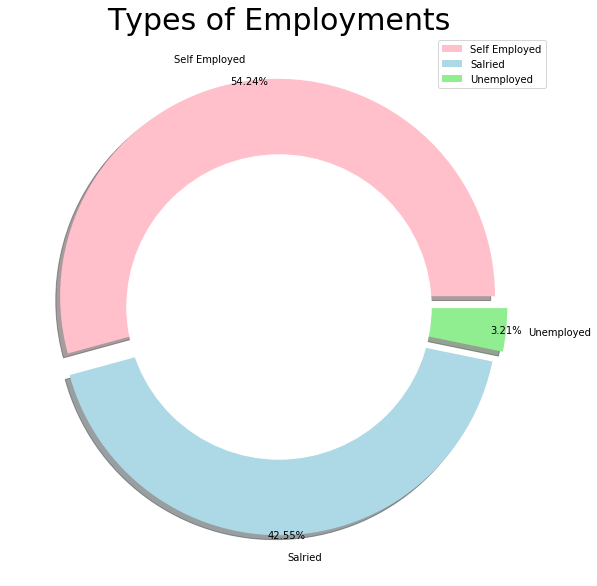

In [120]:
# plotting a donut chart

size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [121]:
# encodings for type of employments

data['Employment.Type'] = data['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
data['Employment.Type'].value_counts()

2    187429
1    147013
0     11104
Name: Employment.Type, dtype: int64

In [122]:
# checking the columns names of the data

data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [123]:
#let's check the unique values of ids in different branchs

print("Total no. of Unique Ids :", data['UniqueID'].nunique())
print("Total no. of Unique Branches :", data['branch_id'].nunique())
print("Total no. of Unique Suppliers :", data['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", data['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", data['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",data['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", data['Employee_code_ID'].nunique())

Total no. of Unique Ids : 345546
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 3089
Total no. of Unique Manufactures : 12
Total no. of Unique Current pincode Ids : 7096
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3398


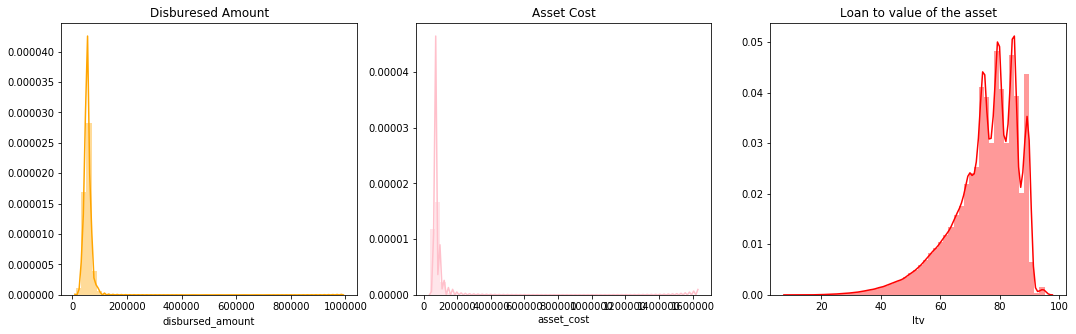

In [124]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

In [125]:
# #performing log transformations on disbursed amount, ltv, and asset cost

# data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
# data['ltv'] = np.log1p(data['ltv'])
# data['asset_cost'] = np.log1p(data['asset_cost'])


# plt.rcParams['figure.figsize'] = (18, 5)

# plt.subplot(1, 3, 1)
# sns.distplot(data['disbursed_amount'],  color = 'orange')
# plt.title('Disburesed Amount')

# plt.subplot(1, 3, 2)
# sns.distplot(data['asset_cost'], color = 'pink')
# plt.title('Asset Cost')

# plt.subplot(1, 3, 3)
# sns.distplot(data['ltv'], color = 'red')
# plt.title('Loan to value of the asset')

# plt.show()

Text(0.5, 1.0, 'Distribution of Year of birth')

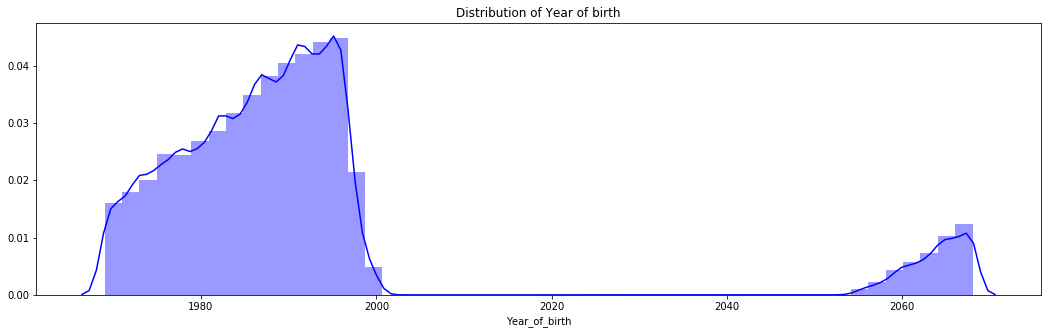

In [126]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format

data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
data['Year_of_birth'] = data['Date.of.Birth'].dt.year

# checking the values inside date of year
sns.distplot(data['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

In [127]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1984
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1985
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1985
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1993
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,2,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1977


In [128]:
data.shape

(345546, 41)

In [25]:
# asdasd

In [129]:

data=data.set_index('UniqueID')
data['Date.of.Birth']=pd.to_datetime(data['Date.of.Birth'])
a=data[(data['Date.of.Birth']>"2019-01-01")]
a['Date.of.Birth']=a['Date.of.Birth'].astype(str)
a['Date.of.Birth']=a['Date.of.Birth'].str.replace('20','19')
a['Date.of.Birth']=pd.to_datetime(a['Date.of.Birth'])
data=data.drop(a.index,axis=0)
data=pd.concat([data,a])
data=data.rename(columns={'Date.of.Birth':'Age'})

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import s

In [131]:
data.reset_index(level=0, inplace=True)


In [132]:
pd.set_option('display.max_columns', None)
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Age,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1984
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1985
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1985
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1993
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,2,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1977


In [133]:
data.shape

(345546, 41)

Text(0.5, 1.0, 'Distribution of Year of birth')

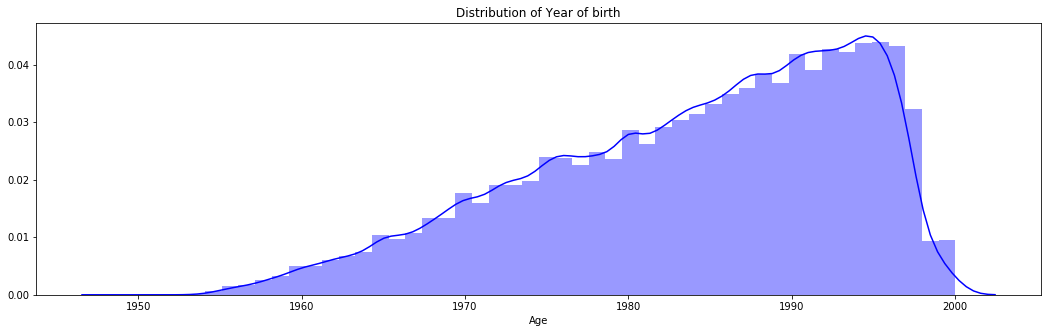

In [134]:


# checking the values inside date of year
sns.distplot(data['Age'].dt.year, color = 'blue')
plt.title('Distribution of Year of birth')

In [135]:
data['Age']=data['Age'].astype('str')

In [136]:
from datetime import datetime
from datetime import date
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [137]:
data['Age'] = data['Age'].apply(calculate_age)

Text(0.5, 1.0, 'Distribution of Age')

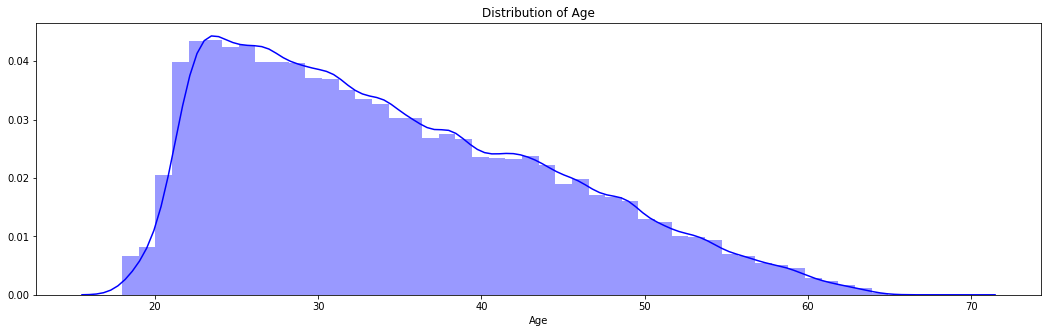

In [138]:
sns.distplot(data['Age'], color = 'blue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'No. of Inquiries')

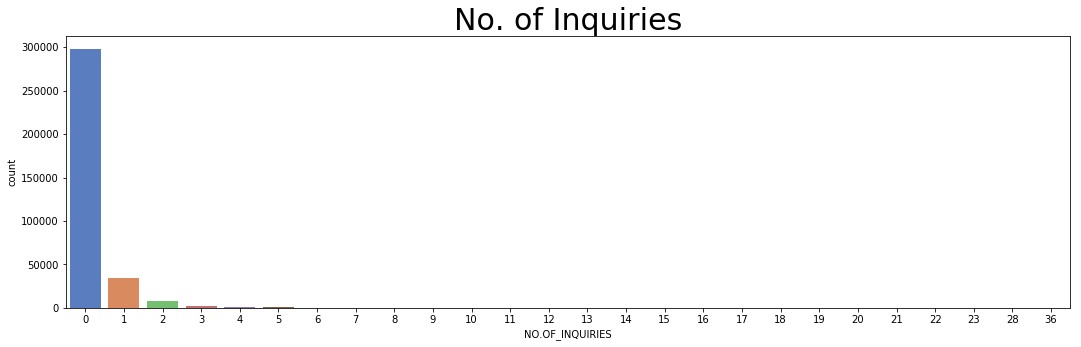

In [139]:
# plotting a countplot

sns.countplot(data['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

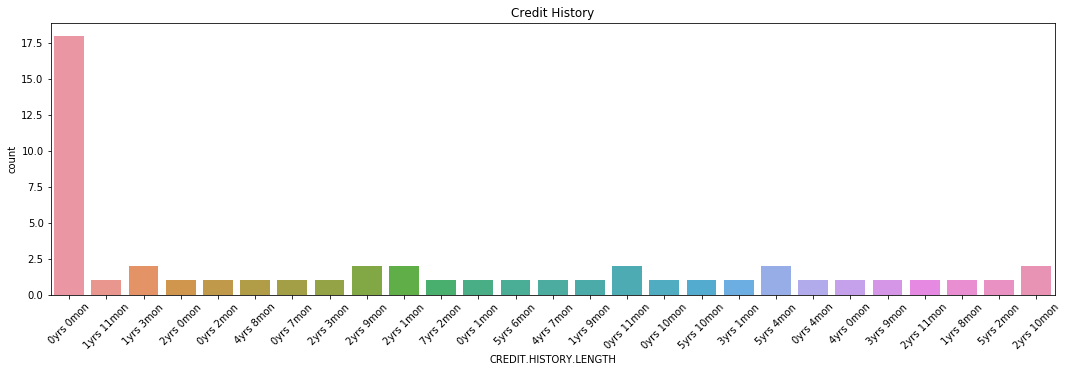

In [140]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

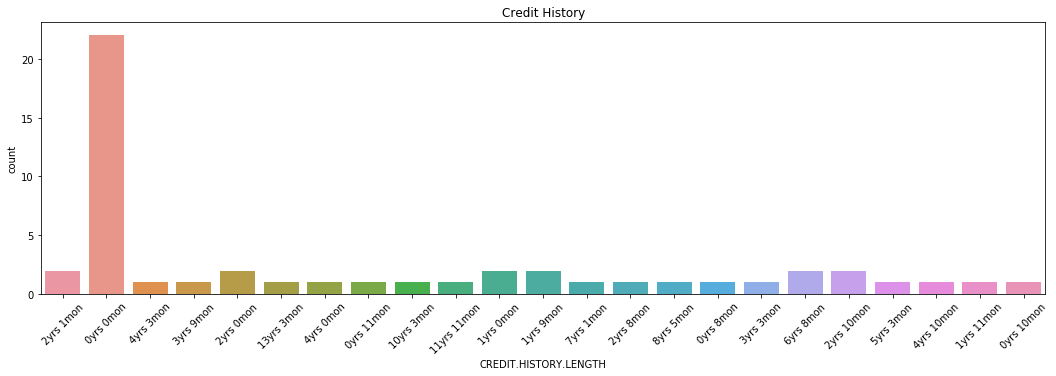

In [141]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [ ]:
# # changing the credit history format from ayrsbmonths to years 
# # as no. of years are more important

# data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
# data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
# #data['CREDIT.HISTORY.LENGTH'].value_counts()

In [ ]:
asdasd

In [142]:
data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].str.replace("yrs","")
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].str.replace("yrs","")
data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].str.replace("mon","")
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].str.replace("mon","")
data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].str.split(" ")
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].str.split(" ")
data['ACC_YEAR']=pd.to_numeric(data['AVERAGE.ACCT.AGE'].str[0])
data['ACC_MONTH']=pd.to_numeric(data['AVERAGE.ACCT.AGE'].str[1])
data['CREDIT_YEAR']=pd.to_numeric(data['CREDIT.HISTORY.LENGTH'].str[0])
data['CREDIT_MONTH']=pd.to_numeric(data['CREDIT.HISTORY.LENGTH'].str[1])
data['AVERAGE.ACCT.AGE_month']=data['ACC_YEAR']*12+data['ACC_MONTH']
data['CREDIT.HISTORY.LENGTH_month']=data['CREDIT_YEAR']*12+data['CREDIT_MONTH']

#Dropping the columns which are not required
data=data.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1)


In [143]:
# Creating new column By feature engineering
data['DisbursalDate']=pd.to_datetime(data['DisbursalDate'])
data['ExpectedRepayment']=data['AVERAGE.ACCT.AGE_month']+data['DisbursalDate'].dt.month

In [144]:
data['CREDIT.HISTORY.LENGTH_month'].head(5)

0     0
1    23
2     0
3    15
4     0
Name: CREDIT.HISTORY.LENGTH_month, dtype: int64

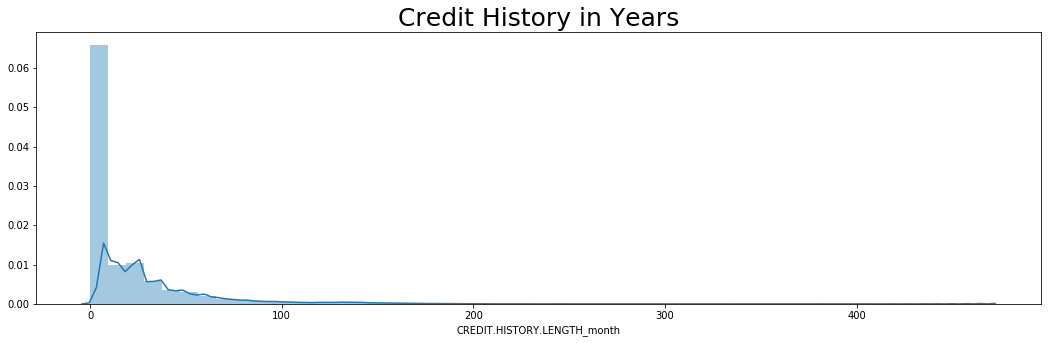

In [145]:
# distribution of credit history years

plt.rcParams['figure.figsize'] = (18, 5)
sns.distplot(data['CREDIT.HISTORY.LENGTH_month'])
plt.title('Credit History in Years', fontsize = 25)
plt.show()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

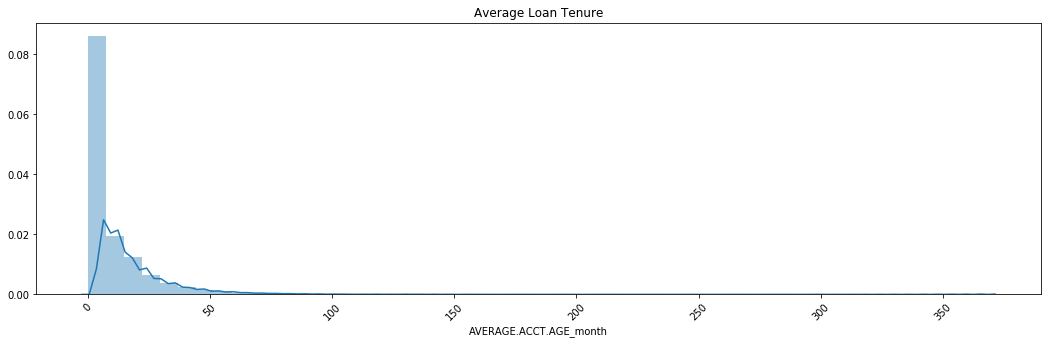

In [146]:
# average.acct.age i.e., average loan tenure

sns.distplot(data['AVERAGE.ACCT.AGE_month'])
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

In [147]:
# loans defaulted in last six months

data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     319144
1      21684
2       3550
3        790
4        220
5         78
6         29
7         21
8         10
9          7
12         5
11         3
10         2
20         1
18         1
16         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [148]:
# new loans taken by the customer before disbursement

data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     272341
1      45965
2      15618
3       6161
4       2636
5       1287
6        625
7        383
8        197
9        109
10        82
11        47
12        28
13        18
14        11
17         9
16         8
15         4
19         4
20         4
18         2
22         2
23         2
28         1
21         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

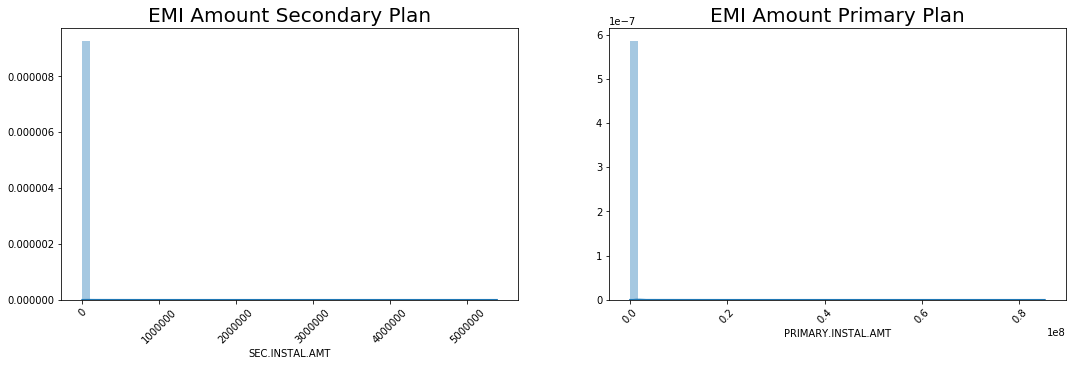

In [149]:
# EMI Amount of the Secondary Plan

plt.subplot(1, 2, 1)
sns.distplot(data['SEC.INSTAL.AMT'])
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(data['PRIMARY.INSTAL.AMT'])
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

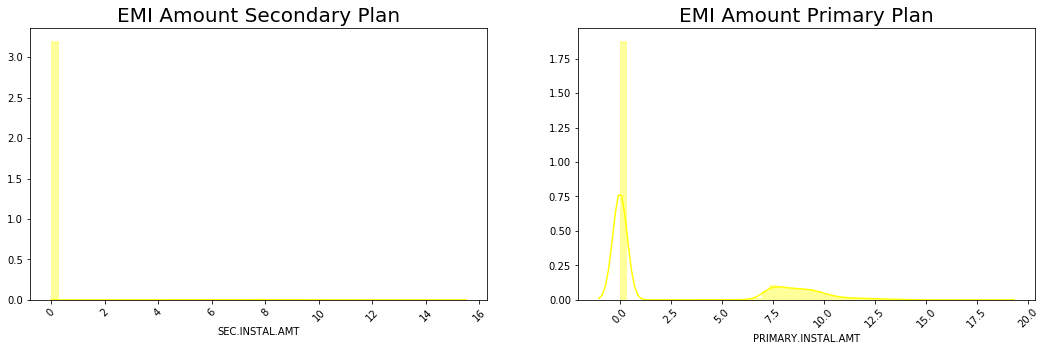

In [150]:
# let's apply log transformations on EMI Amount of the Primary Loan and Secondary loan

data['PRIMARY.INSTAL.AMT'] = np.log1p(data['PRIMARY.INSTAL.AMT'])
data['SEC.INSTAL.AMT'] = np.log1p(data['SEC.INSTAL.AMT'])

plt.subplot(1, 2, 1)
sns.distplot(data['SEC.INSTAL.AMT'], color = 'yellow')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(data['PRIMARY.INSTAL.AMT'],color = 'yellow')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.,  60000000.,  70000000.]),
 <a list of 9 Text xticklabel objects>)

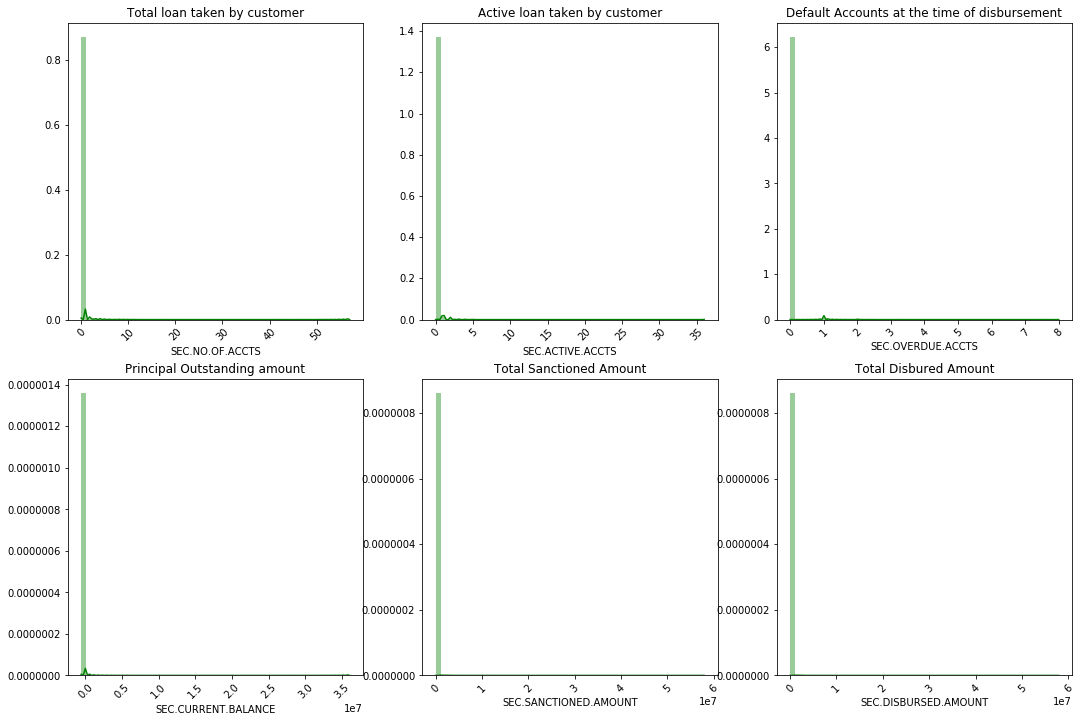

In [151]:
# distribution for different attributesof secondary accounts


plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'green')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'green')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'green')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

In [56]:
# applying log transformation to all these attributes

data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
#data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)


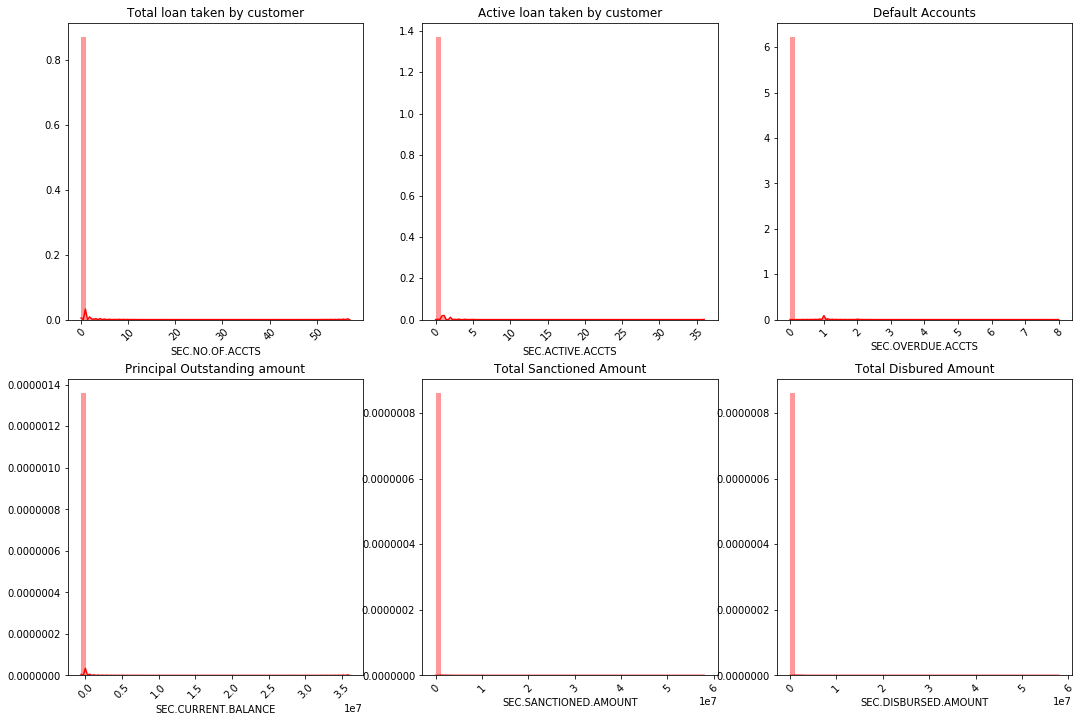

In [152]:

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'red')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'red')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'red')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

In [58]:
#  applying log transformations to the primary account attributes

data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
#data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
#data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])


#  filling  missing values in sec.current.balance
data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)
data['PRI.SANCTIONED.AMOUNT'].fillna(data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)


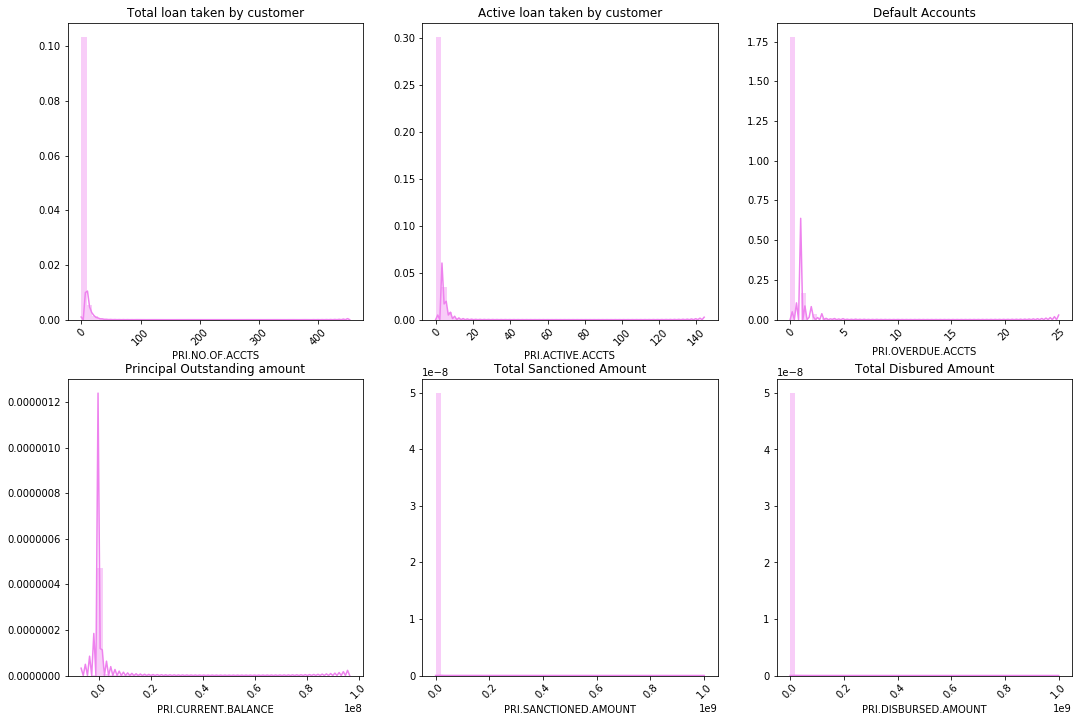

In [153]:
# plotting distribution plots for these attributes

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

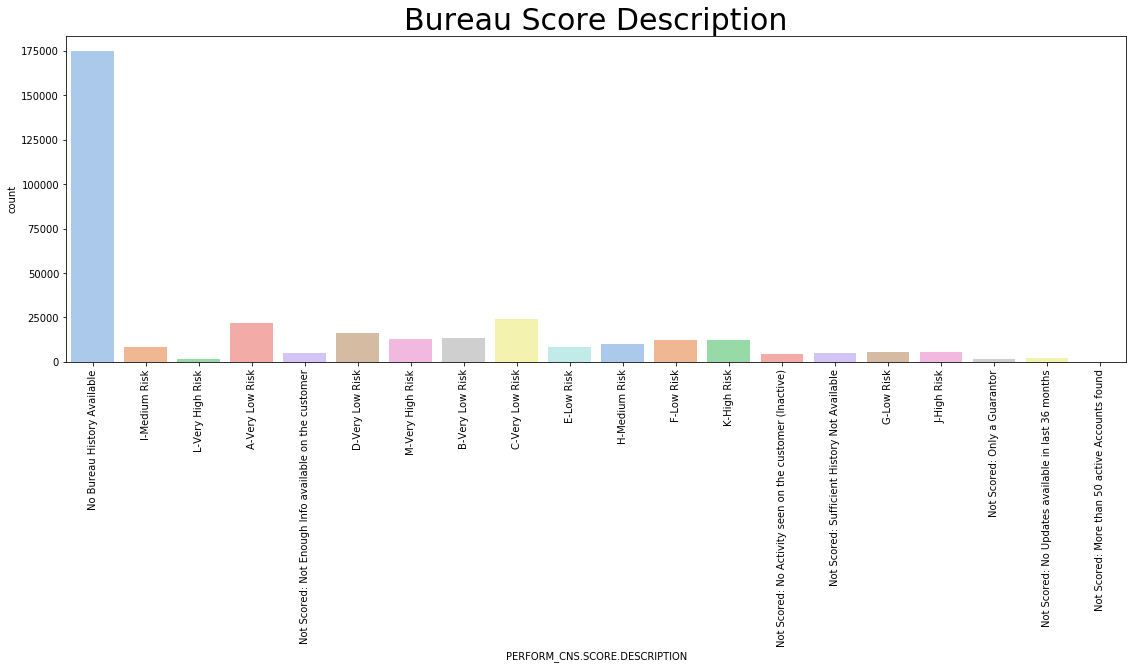

In [60]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [154]:
# checking the perform cns score description

data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [155]:
# encodings for bureau score(perform cns score distribution)

data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()


0    192802
5     75721
4     26364
3     18402
2     17667
1     14590
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

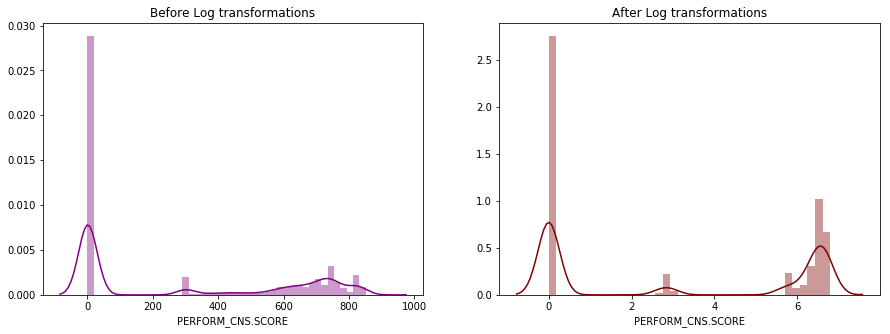

In [63]:
# checking the bureau score

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'purple')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
data['PERFORM_CNS.SCORE'] = np.log1p(data['PERFORM_CNS.SCORE'])
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'maroon')
plt.title('After Log transformations')

plt.show()

In [156]:
# customer has passport or not

data['Passport_flag'].value_counts()

0    344835
1       711
Name: Passport_flag, dtype: int64

In [157]:
# customer has driving license or not

data['Driving_flag'].value_counts()

0    338249
1      7297
Name: Driving_flag, dtype: int64

In [158]:
# customer has voter-id card or not

data['VoterID_flag'].value_counts()

0    298155
1     47391
Name: VoterID_flag, dtype: int64

In [159]:
# customer has pan card or not

data['PAN_flag'].value_counts()

0    306392
1     39154
Name: PAN_flag, dtype: int64

In [160]:
# customer has aadhar card or not

data['Aadhar_flag'].value_counts()

1    293663
0     51883
Name: Aadhar_flag, dtype: int64

In [161]:
# customer has shared the mobile no. or not

data['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

In [162]:
# lets extract features from disbursal dates
# as all  the disbursement dates are of year 2018 so we can extract the months

data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
data['DisbursalMonth'] = data['DisbursalDate'].dt.month

data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

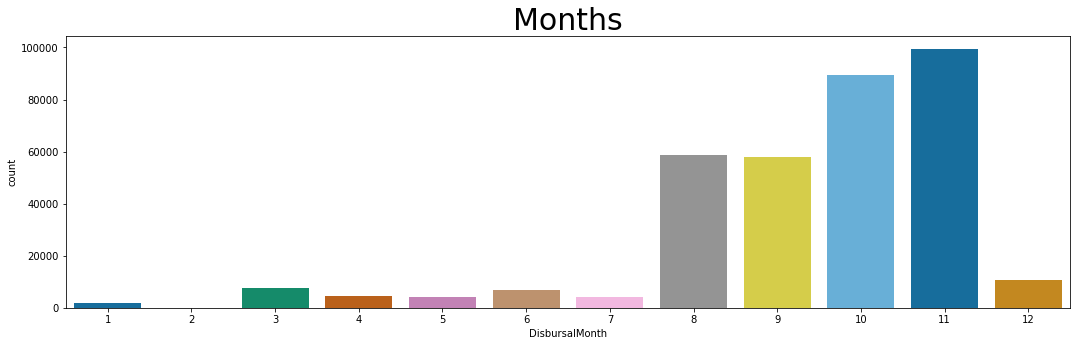

In [163]:
# plotting the Disbursal date

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)
plt.show()

In [164]:
# some attributes are categorical but they are in integer so let's convert them into category

data['branch_id'] = data['branch_id'].astype('category')
data['manufacturer_id'] = data['manufacturer_id'].astype('category')
data['State_ID'] = data['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['branch_id'] = le.fit_transform(data['branch_id'])
data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
data['State_ID'] = le.fit_transform(data['State_ID'])

# checking the values in these attributes
#data['branch_id'].value_counts()
#data['manufacturer_id'].value_counts()
#data['State_ID'].value_counts()

In [165]:
# removing unnecassary columns

data = data.drop(['UniqueID','supplier_id', 'Current_pincode_ID', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

# checking the new columns of data
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Age', 'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'Year_of_birth', 'ACC_YEAR', 'ACC_MONTH', 'CREDIT_YEAR', 'CREDIT_MONTH',
       'AVERAGE.ACCT.AGE_month', 'CREDIT.HISTORY.LENGTH_month',
       'ExpectedRepayment', 'DisbursalMonth'],
      dtype='object')

In [166]:
# looking at the sample of the pre-processed data

data.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Age,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Year_of_birth,ACC_YEAR,ACC_MONTH,CREDIT_YEAR,CREDIT_MONTH,AVERAGE.ACCT.AGE_month,CREDIT.HISTORY.LENGTH_month,ExpectedRepayment,DisbursalMonth
142405,34479,65440,55.01,18,5,26,1,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,1993,0,0,0,0,0,0,8,8
294993,53693,78575,71.27,24,0,47,1,5,1,1,0,0,0,0,737,5,3,1,0,13422,52900,52900,0,0,0,0,0,0,8.828934,0.0,0,0,0,1972,0,11,1,7,11,19,22,11
142106,56459,65508,87.32,11,0,23,1,10,1,1,0,0,0,0,737,5,2,1,0,39223,52400,52400,0,0,0,0,0,0,8.633375,0.0,0,0,0,1995,0,7,0,8,7,8,17,10
290201,76751,104362,74.74,8,2,31,2,2,1,1,0,0,0,0,531,2,3,3,0,54066,214350,214350,0,0,0,0,0,0,9.068777,0.0,2,0,0,1988,1,0,2,8,12,32,23,11
245090,52303,74582,71.06,59,5,45,0,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,1974,0,0,0,0,0,0,11,11


In [167]:
# checking the target variable

y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [168]:
# there is a big difference in the no. of values for 1 and 0
# so we can apply SMOTE or over-sampling
# that means replicating the samples of 1 to lessen the parity between 0 and 1 values

# lets install imblearn
#!pip install -U imbalanced-learn

In [169]:
# separating train and test datasets from data

x_train = data.iloc[:233154,:]
x_test = data.iloc[233154:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 42)
Shape of test : (112392, 42)


In [170]:
# applying SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 42)
Shape of y: (365086,)


In [172]:

# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(292068, 42)
(292068,)
(73018, 42)
(73018,)


In [173]:
# applying standardization

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9847330073818426
Testing Accuarcy:  0.8420800350598483
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     36647
           1       0.95      0.72      0.82     36371

   micro avg       0.84      0.84      0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



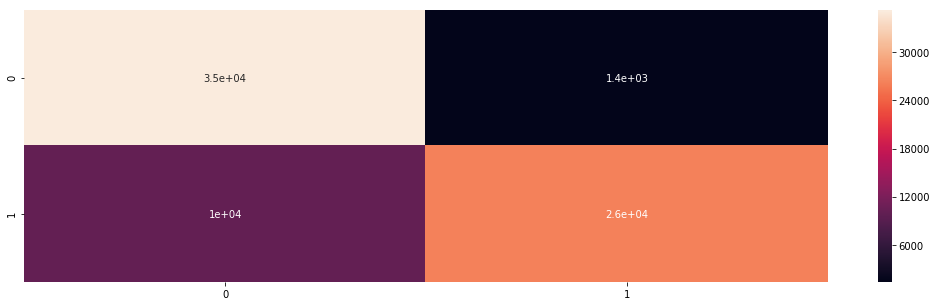

In [174]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [175]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8232501953366664


(0.0, 1.0)

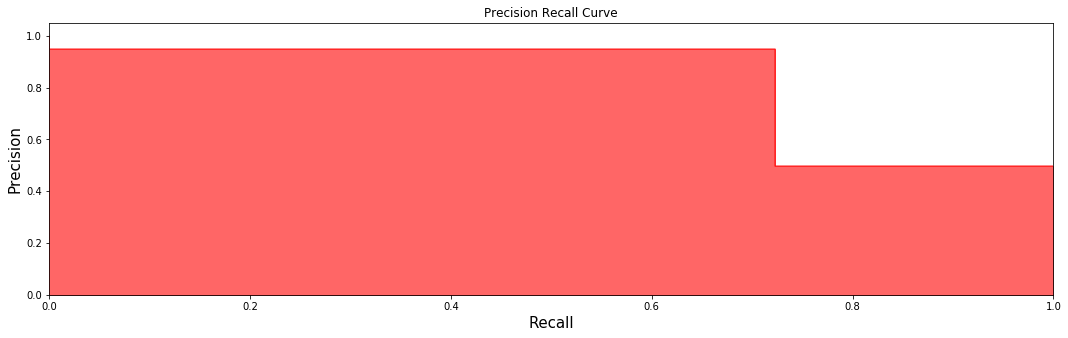

In [176]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.8168816850870345
Testing Accuarcy:  0.8136623846174916
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     36647
           1       0.95      0.66      0.78     36371

   micro avg       0.81      0.81      0.81     73018
   macro avg       0.85      0.81      0.81     73018
weighted avg       0.85      0.81      0.81     73018



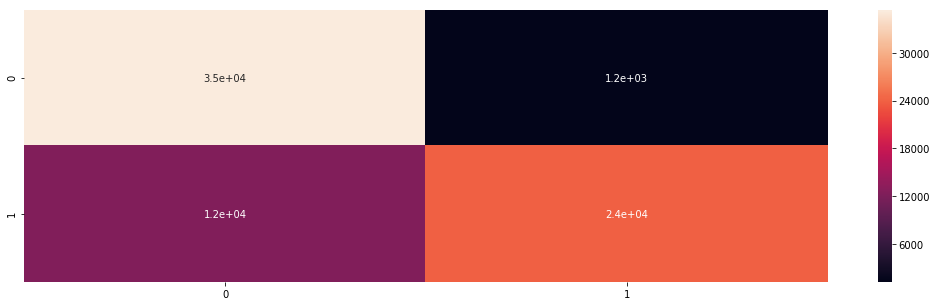

In [177]:
# ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [178]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7969519887108776


(0.0, 1.0)

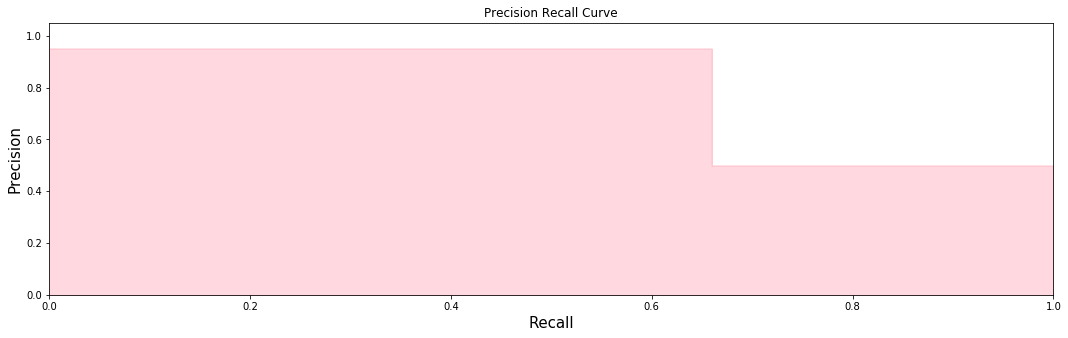

In [179]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.8465973677362806
Testing Accuarcy:  0.8446410474129666
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     36647
           1       1.00      0.69      0.82     36371

   micro avg       0.84      0.84      0.84     73018
   macro avg       0.88      0.84      0.84     73018
weighted avg       0.88      0.84      0.84     73018



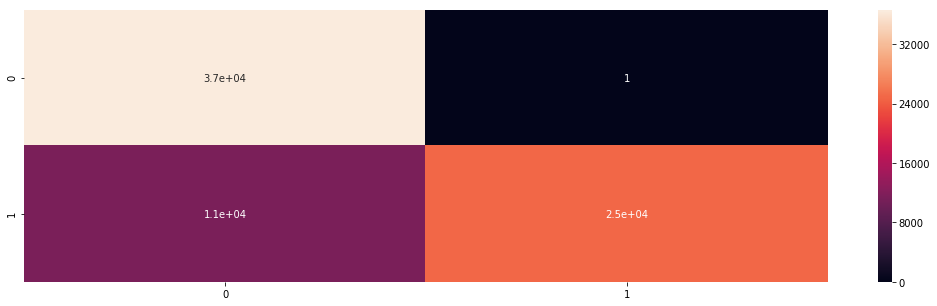

In [180]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [181]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8434484175425913


(0.0, 1.0)

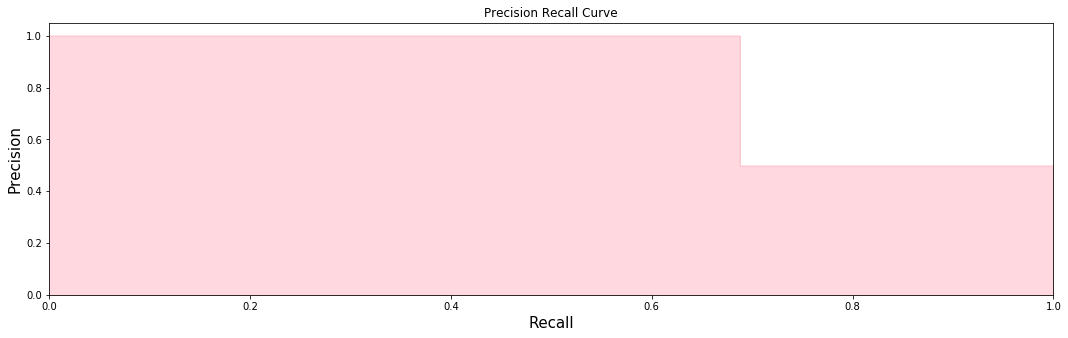

In [182]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [183]:
# !pip install lightgbm

Training Accuracy:  0.8582556117068628
Testing Accuarcy:  0.8563915746802159
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     36647
           1       1.00      0.71      0.83     36371

   micro avg       0.86      0.86      0.86     73018
   macro avg       0.89      0.86      0.85     73018
weighted avg       0.89      0.86      0.85     73018



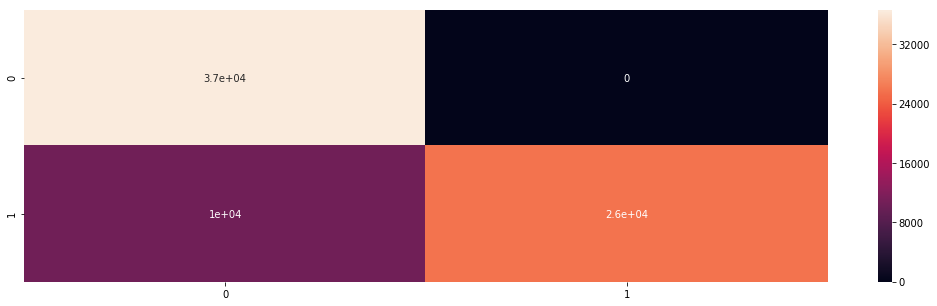

In [184]:
# light boost classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(x_train, y_train)

y_pred = model_lgb.predict(x_valid)

print("Training Accuracy: ", model_lgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [185]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8553018074099109


(0.0, 1.0)

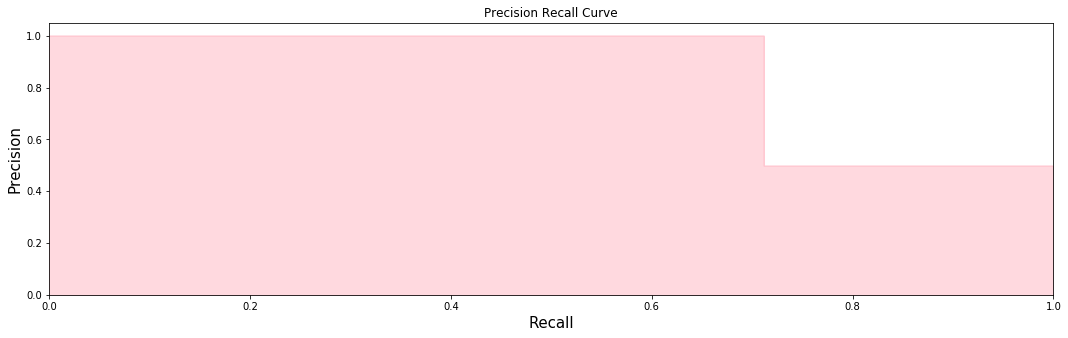

In [186]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

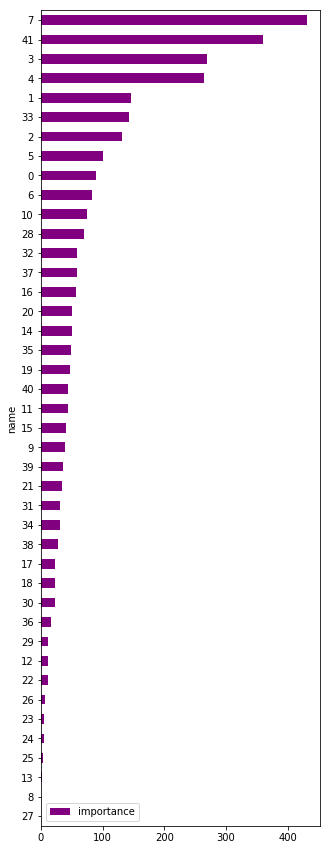

In [187]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

In [188]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

dtcl = DecisionTreeClassifier(criterion = 'entropy', random_state=100)
etcl = ExtraTreesClassifier(criterion = 'gini', random_state=100)
lrcl = LogisticRegression(random_state=100)
rfcl = RandomForestClassifier(random_state=100)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dtcl, n_estimators=50 , random_state=100)
xgb = XGBClassifier(booster='gbtree',
                    gamma=0.01,
                    learning_rate = 0.01,
                    max_depth = 6,
                    min_child_weight= 1,
                    n_estimators= 100,
                    subsample= 0.5,
                    random_state= 100)
ada = AdaBoostClassifier(algorithm = 'SAMME.R',
                         learning_rate= 0.001,
                         n_estimators = 200, random_state=100)

In [97]:
enclf = VotingClassifier(estimators = [('dt', dtcl), ('et', etcl), ('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('xgb',xgb) ,('ada',ada)], voting = 'soft')
#enclf = VotingClassifier(estimators = [('rf', rfcl)], voting = 'soft')

enclf.fit(x_train, y_train)
y_predict = enclf.predict(x_train)
model_score = enclf.score(x_train, y_train)
print("Prediction on train dataset")
print('Accuracy  = %0.3f' % (model_score*100),"%")
y_pred_proba = enclf.predict_proba(x_train)[:,1]
print('Area under curve = %0.3f' % (roc_auc_score(y,y_pred_proba)*100),"%")

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Prediction on train dataset
Accuracy  = 99.991 %


NameError: name 'X' is not defined

In [ ]:
x_test.columns=x_train.columns

In [ ]:
x_test=pd.DataFrame(x_test)

In [194]:
# let's predict for the tests set

y_pred_rf = model_rf.predict_proba(x_test)
y_pred_ada = model_ada.predict_proba(x_test)
y_pred_xgb = model_xgb.predict_proba(x_test)
y_pred_lgb = model_lgb.predict_proba(x_test)
#y_pred_ensem = enclf.predict_proba(x_test)

In [195]:
# Boosting
# as random forest and lgboost performed better than adaboost and xgboost
# so we prefer to give lgbbost and randomforest more importance

predictions = y_pred_rf*0.3 + y_pred_ada*0.2 + y_pred_xgb*0.2 + y_pred_xgb*0.3


In [ ]:
pd.DataFrame(predictions)[1]

In [ ]:
pd.DataFrame(y_pred_ensem)[1]

In [ ]:
# lets look at the submission file

submission = pd.read_csv('sample_submission_24jSKY6.csv')

submission.head()

In [207]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': pd.DataFrame(predictions)[1]})

#Visualize the first 5 rows
submission.head()

,UniqueID,loan_default
0,655269,0.211775
1,723482,0.256309
2,758529,0.290808
3,763449,0.259513
4,708663,0.264642


In [208]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


In [209]:
submission['loan_default'].value_counts()

0.314666    72
0.306783    71
0.344666    66
0.336783    56
0.276783    52
0.366783    50
0.294780    48
0.264780    46
0.327568    46
0.269116    44
0.357568    42
0.308597    42
0.325980    41
0.295980    41
0.291270    39
0.374666    39
0.297640    39
0.349345    38
0.294714    37
0.297568    37
0.302838    36
0.265980    36
0.303245    35
0.266461    35
0.319345    35
0.277192    35
0.261700    34
0.324780    34
0.335259    34
0.272838    34
            ..
0.335921     1
0.261499     1
0.235628     1
0.258671     1
0.342059     1
0.386813     1
0.317355     1
0.307722     1
0.328968     1
0.275681     1
0.334421     1
0.343188     1
0.298860     1
0.279174     1
0.222206     1
0.214240     1
0.410177     1
0.426668     1
0.361878     1
0.229703     1
0.267521     1
0.322131     1
0.417708     1
0.396106     1
0.287954     1
0.296402     1
0.283033     1
0.262219     1
0.248685     1
0.374145     1
Name: loan_default, Length: 87673, dtype: int64